Рассмотрим двумерный процесс, в котором каждая компонента является $\alpha$-устойчивым субординатором с тройкой Леви $(0,0, \nu)$, где мера Леви $\nu$ равна
$$
\nu(B) = \int_B \frac{A}{x^{\alpha+1}} I\{x \geq 0 \} dx, \qquad 
\alpha \in (0,1), A>0,
$$ а зависимость между компонентами выражается копулой Леви-Клейтона 
$$
F(x,y) = \bigl(x^{-\theta}+y^{-\theta}\bigr)^{-1/\theta}, 
\qquad \theta >0.
$$
 Напишите программу, которая при фиксированных параметрах $\alpha, A, \theta$ строит траектории двумерного процесса, равного по распределению исходному для $t \in [0,1]$ (траектории можно отобразить на равномерной сетке с шагом $\Delta=1/100$.  Изменяя параметр $\theta$ покажите, что маленькие значения $\theta$ свидетельствуют о слабой зависимости между компонентами, а большие значения $\theta$ -  о сильной зависимости.

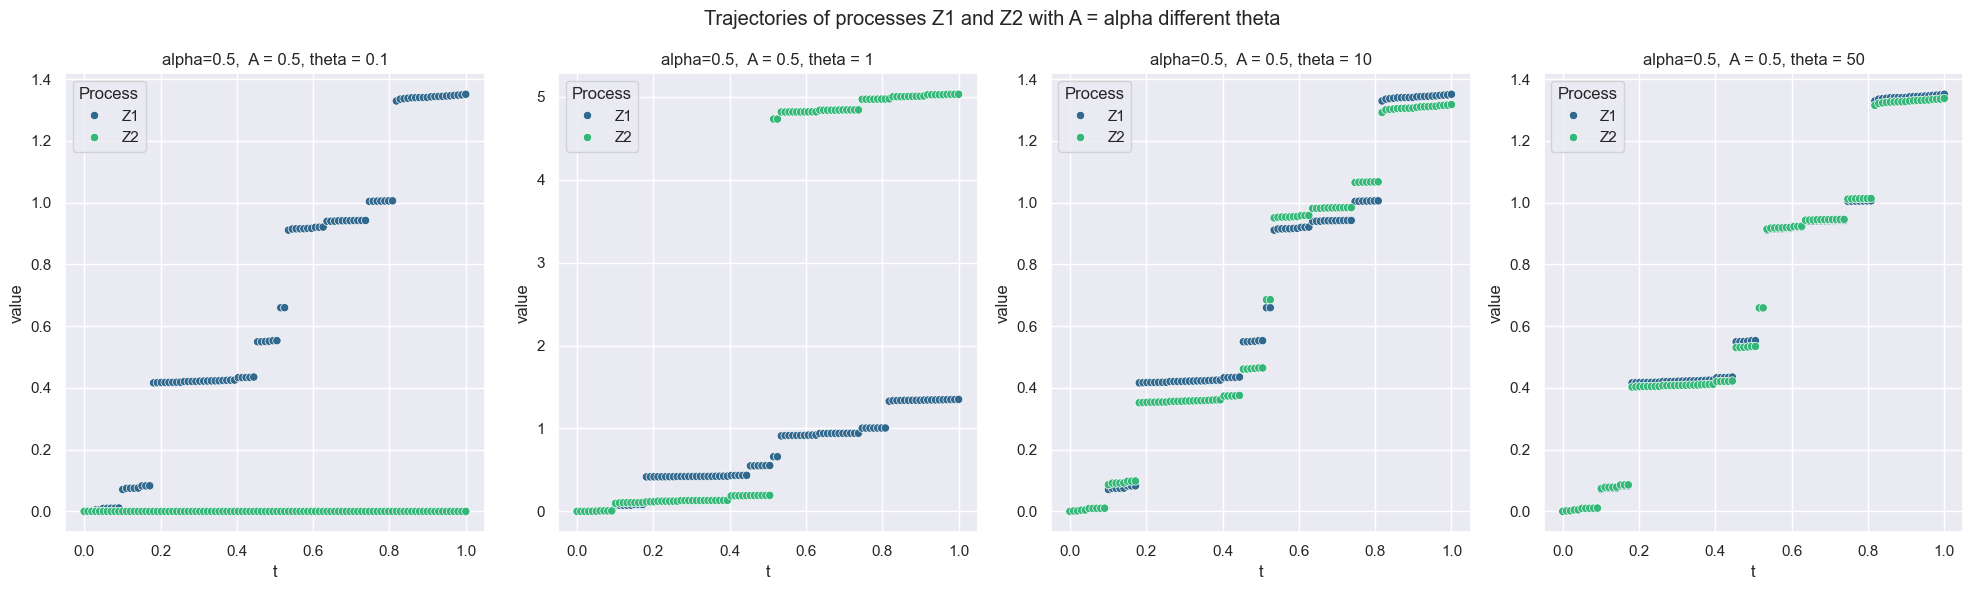

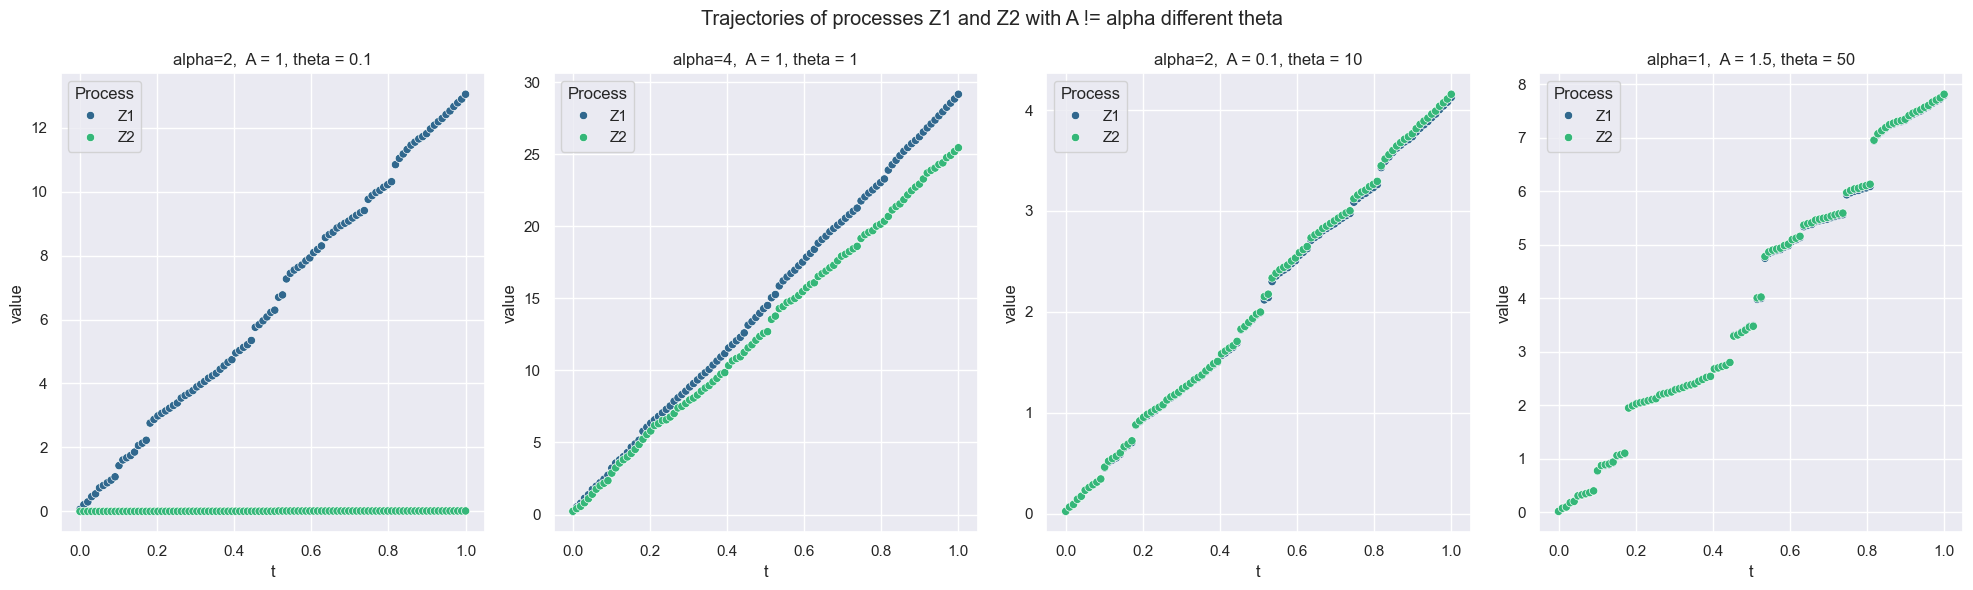

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
def GenerateProcess(a: float, A: float, theta: float, ax):
    np.random.seed(52)
    t = np.linspace(0, 1, 100) #генерим сетку для времени 
    G1 = np.random.exponential(1, 100) #выборка из экспоненциального с lambda = 1 
    G1 = np.cumsum(G1) # получаем массив Гамма1 


    xi = np.random.uniform(0, 1, 100) #выборка из равномерного распределения 
    G2 = G1 * (xi ** (-theta / (1 + theta)) - 1) ** (-1 / theta) #гамма 2 поя формуле из алгоритма 
    V = np.random.uniform(0, 1, 100) # очередная выборка из равномерного распределения 
    indices = np.argsort(V) #сортируем в порядке возрастания и берем индексы 

    W1 = ((A / a) ** (1 / a) * (G1) ** (-1 / a))[indices] # тут считаем обратную функцию к остаточному интегралу учитывая А и alpha, берем в порядке зафиксированных нами индексов 
    W2 = ((A / a) ** (1 / a) * (G2) ** (-1 / a))[indices]

    Z1_cumsum = np.cumsum(W1) #считаем куммулятивные суммы и получаем траектории нашего процесса 
    Z2_cumsum = np.cumsum(W2)

    data = pd.DataFrame({'t': t, 'Z1': Z1_cumsum, 'Z2': Z2_cumsum})

    data_melted = data.melt(id_vars='t', value_vars=['Z1', 'Z2'],
                                var_name='Process', value_name='value')
    plt.tight_layout()
    sns.set_theme(style="darkgrid")
    sns.scatterplot(data=data_melted, x='t', y='value', hue='Process', palette='viridis', ax=ax).set(title=f'alpha={a},  A = {A}, theta = {theta}')
    

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))
fig.suptitle('Trajectories of processes Z1 and Z2 with A = alpha different theta')
    
GenerateProcess(0.5, 0.5, 0.1, ax1) #сделаем сначала для a = A как в конспекте 
GenerateProcess(0.5, 0.5, 1, ax2)
GenerateProcess(0.5, 0.5, 10, ax3)
GenerateProcess(0.5, 0.5, 50, ax4)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))
fig.suptitle('Trajectories of processes Z1 and Z2 with A != alpha different theta')

GenerateProcess(2, 1, 0.1, ax1) #теперь А != а
GenerateProcess(4, 1, 1, ax2)
GenerateProcess(2, 0.1, 10, ax3)
GenerateProcess(1, 1.5, 50, ax4)

Как видим действительно, маленькие значения $\theta$ говорят о слабой зависимости, а большие - о сильной

В коде для подсчета промежуточных массивов $W_1$ и $W_2$ использовалась формула $U^{-1}(y) = \left(\frac{A}{\alpha} \right)^{\frac{1}{\alpha}}y^{-\frac{1}{\alpha}}$

Покажем почему это валидно:

$$U_j(x_j) = \int_{x_j}^{ \infty}\frac{A}{x^{\alpha+1}} I\{x \geq 0 \} dx = \int_{x_j}^{ \infty}\frac{A}{x^{\alpha+1}} dx = A \left(-\frac{x^{-\alpha}}{\alpha}\right) \Biggr|_{x_j}^{\infty} = A\left(0 + \frac{x_j^{-\alpha}}{\alpha}\right) = \frac{A}{x_j^{\alpha}\alpha}$$

Теперь найдем обратную фукнцию:

$$y = \frac{A}{x^{\alpha}\alpha}; \ x^{-\alpha} = y \frac{\alpha}{A}; \ x = y^{-\frac{1}{\alpha}}\left( \frac{A}{\alpha} \right)^{\frac{1}{\alpha}}$$

Таким образом: $U^{-1}(y) = \left(\frac{A}{\alpha} \right)^{\frac{1}{\alpha}}y^{-\frac{1}{\alpha}}$